In [22]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [23]:
# import diabetes data
diabetes = pd.read_csv("data/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# drop pregnancies because men can't bear children
diabetes.drop(["BloodPressure"], axis=1, inplace=True)
# drop diabetes pedigree fn to simplify data entry
diabetes.drop(["DiabetesPedigreeFunction"], axis=1, inplace=True)

In [26]:
diabetes.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,35,0,33.6,50,1
1,1,85,29,0,26.6,31,0
2,8,183,0,0,23.3,32,1
3,1,89,23,94,28.1,21,0
4,0,137,35,168,43.1,33,1


In [28]:
# change erroneous 0 values to null for a better count 
diabetes[["Glucose","SkinThickness","Insulin","BMI"]] = diabetes[["Glucose","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

In [29]:
# check for / count null values
diabetes.isnull().sum()

Pregnancies        0
Glucose            5
SkinThickness    227
Insulin          374
BMI               11
Age                0
Outcome            0
dtype: int64

In [30]:
# fill null values with median
diabetes.groupby(["Outcome"])["Glucose"].median()
diabetes["Glucose"].fillna(diabetes.groupby(["Outcome"])["Glucose"].transform("median"),inplace=True)

In [31]:
# fill null values with median
diabetes.groupby(["Outcome"])["SkinThickness"].median()
diabetes["SkinThickness"].fillna(diabetes.groupby(["Outcome"])["SkinThickness"].transform("median"),inplace=True)

In [32]:
# fill null values with median
diabetes.groupby(["Outcome"])["Insulin"].median()
diabetes["Insulin"].fillna(diabetes.groupby(["Outcome"])["Insulin"].transform("median"),inplace=True)

In [33]:
# fill null values with median
diabetes.groupby(["Outcome"])["BMI"].median()
diabetes["BMI"].fillna(diabetes.groupby(["Outcome"])["BMI"].transform("median"),inplace=True)

In [34]:
# check for / count null values after fill
diabetes.isnull().sum()

Pregnancies      0
Glucose          0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

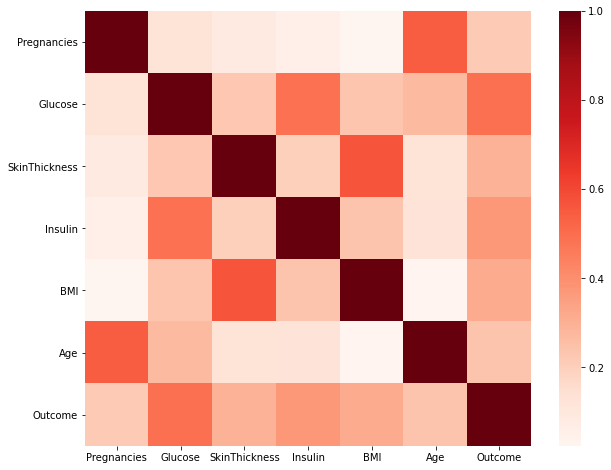

In [35]:
# show heatmap to show visualization of correlation
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(),cmap='Reds',annot=False);

/Users/parkerchristy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/parkerchristy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/parkerchristy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

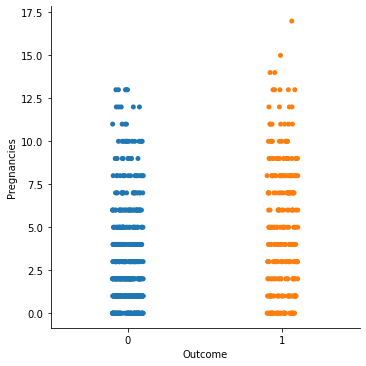

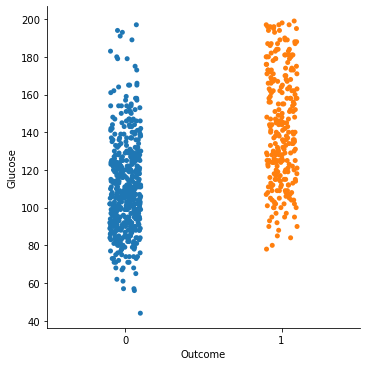

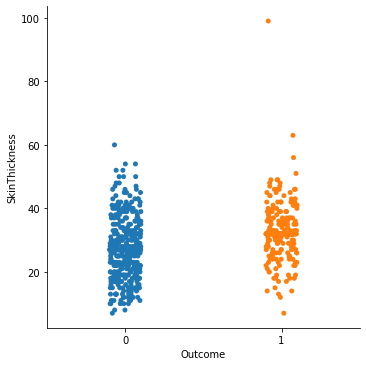

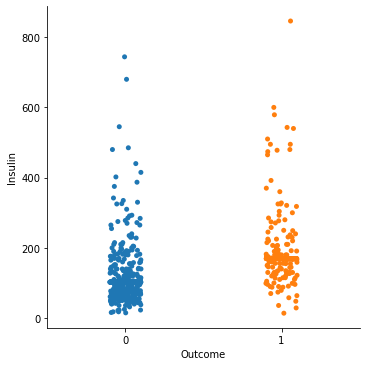

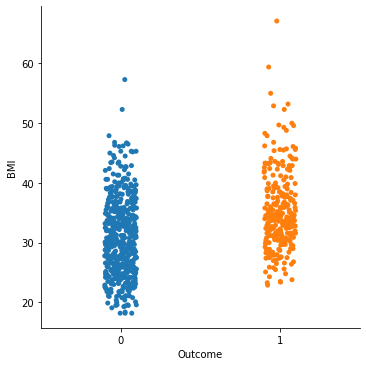

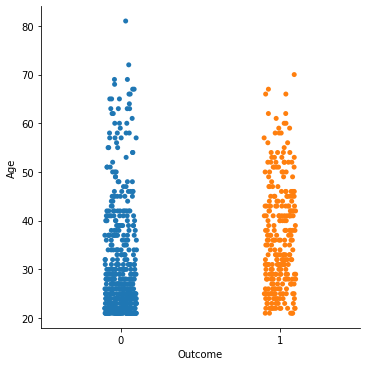

In [36]:
# show comparison distributions of each column vs. the outcome
for col in diabetes.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = diabetes)

In [37]:
from sklearn.model_selection import train_test_split

# split into x/y
x = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)

In [38]:
# build machine learning model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

clf = RandomForestClassifier(n_estimators=500)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8506493506493507

In [39]:
clf.predict(x_test)


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
np.array(y_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
# compare predictions to truth
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8506493506493507

In [42]:
import pickle

# save model to file
pickle.dump(clf, open("random_forest_model.pkl", "wb"))

In [43]:
# load model
loaded_pickle_model = pickle.load(open("random_forest_model.pkl", "rb"))